<a href="https://colab.research.google.com/github/Gabrikon/Breast-Cancer-Prediction/blob/main/Breast_Cancer_Prediction_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🩺 Breast Cancer Prediction Using Artificial Neural Networks (ANN)

![Breast Cancer Awareness](/content/Breast-cancer.jpg)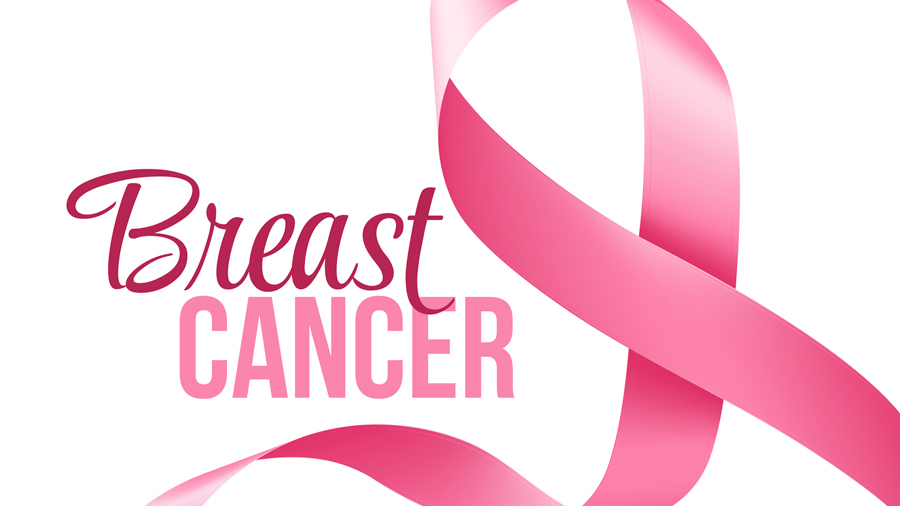

## **Project Overview**

This project focuses on **predicting breast cancer diagnosis** using an **Artificial Neural Network (ANN)** model trained on the **Breast Cancer Wisconsin Dataset** from Kaggle.  

The dataset contains measurements of cell nuclei from digitized images of breast masses. Each sample is classified as **benign (B)** or **malignant (M)** based on several features such as radius, texture, perimeter, and smoothness.  

The main objective is to build a machine learning pipeline that:
- Loads and preprocesses the dataset  
- Explores and visualizes important statistical patterns  
- Builds and trains a neural network model  
- Evaluates the model’s predictive performance using classification metrics  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report

## **Dataset Summary**

| Property | Description |
|-----------|-------------|
| Source | [Kaggle: Breast Cancer Wisconsin Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) |
| Samples | 569 |
| Features | 32 (excluding ID column) |
| Target | `diagnosis` — M (malignant) / B (benign) |
| Type | Tabular (numeric features) |


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 44.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2


## Data Preparation

In [3]:
df = pd.read_csv(path + "/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df = df.drop(columns= ['id', 'Unnamed: 32'], errors='ignore')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory data Analysis

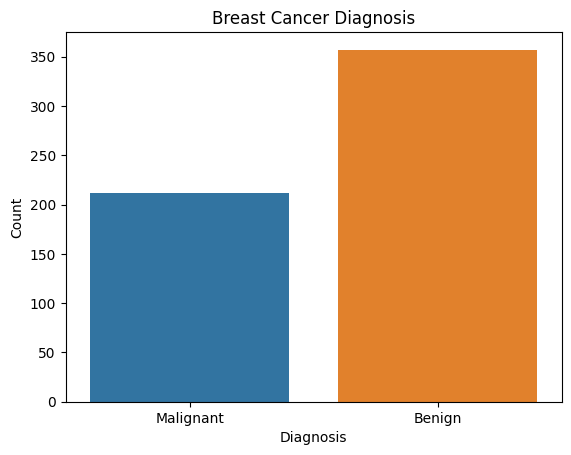

In [8]:
sns.countplot(x='diagnosis',hue='diagnosis', data=df, legend=False)
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(['B', 'M'], ['Benign', 'Malignant'])
plt.show()

In [9]:
fig = px.pie(df, names='diagnosis',
             title='Diagnosis Distribution (Benign vs Malignant)'
)
fig.show()

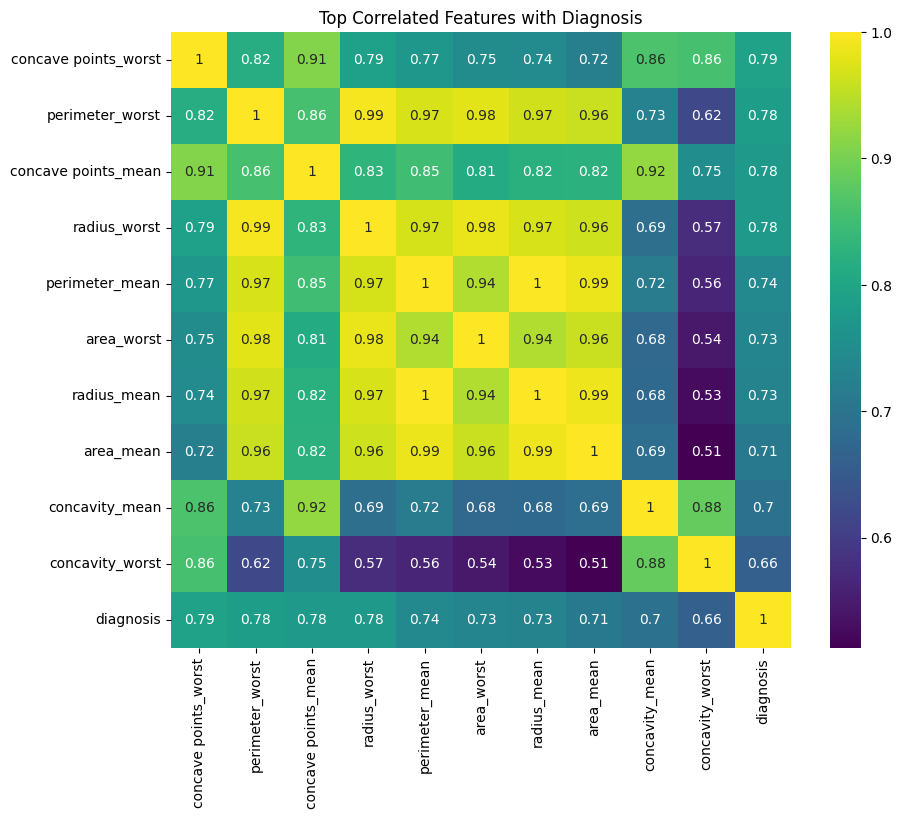

In [10]:
# Heatmap of diagnosis (M=1, B=0)
df_map = df.copy()
df_map['diagnosis'] = df_map['diagnosis'].map({'M': 1, 'B': 0})

top_corr = df_map.corr()['diagnosis'].abs().sort_values(ascending=False)[1:11]

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df_map[top_corr.index.tolist() + ['diagnosis']].corr(), annot=True, cmap="viridis")
plt.title("Top Correlated Features with Diagnosis")
plt.show()

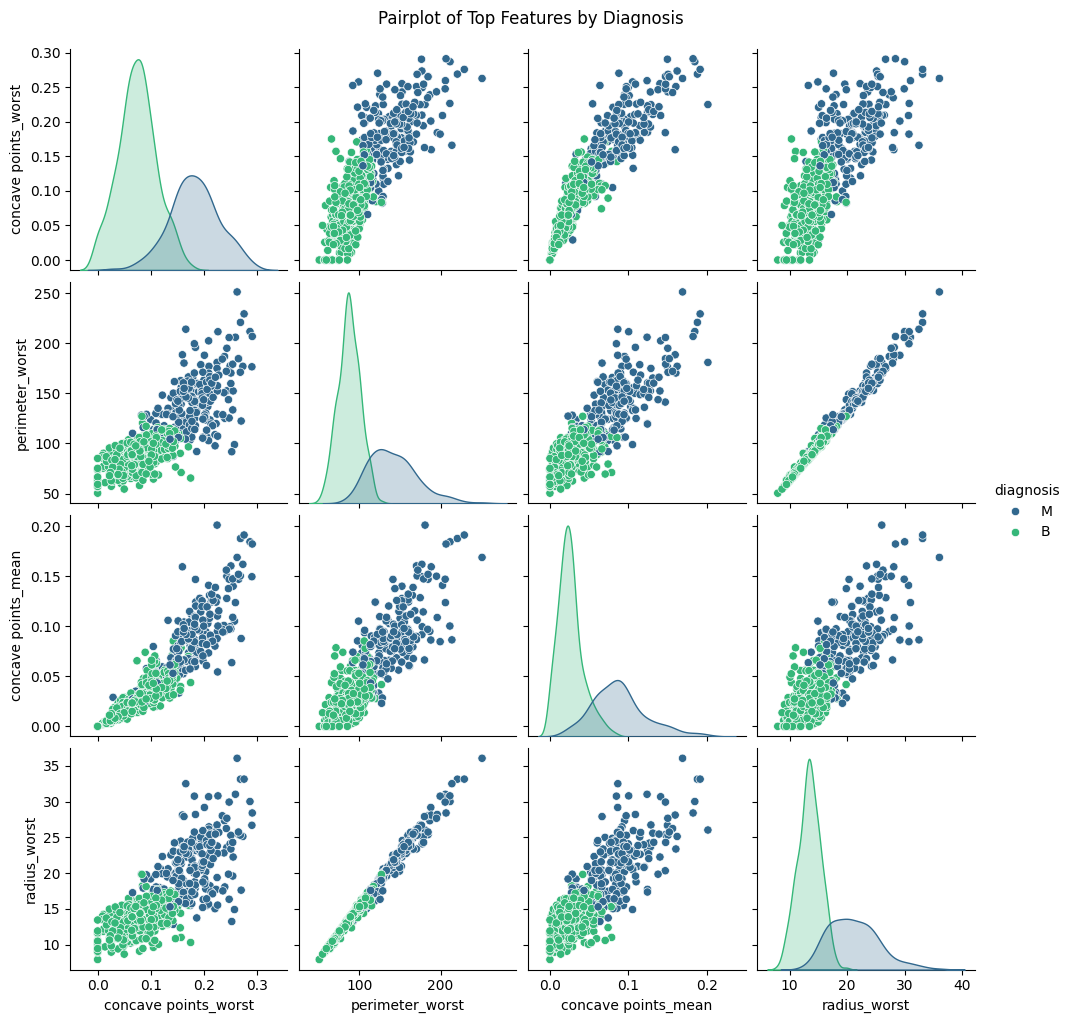

In [11]:
# Create pairplot colored by diagnosis
top_features = top_corr.index.tolist()[:4]

sns.pairplot(df, vars=top_features, hue="diagnosis",
            palette="viridis", diag_kind="kde", height=2.5)

plt.suptitle("Pairplot of Top Features by Diagnosis", y=1.02)
plt.show()

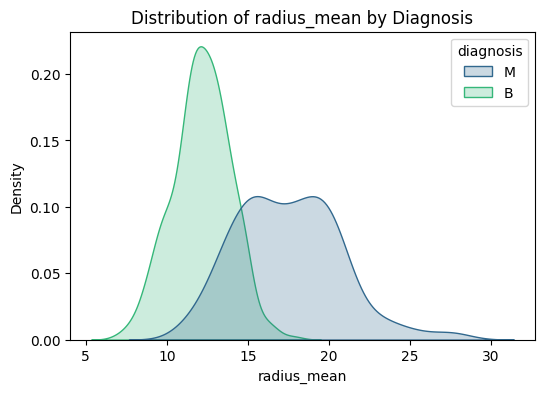

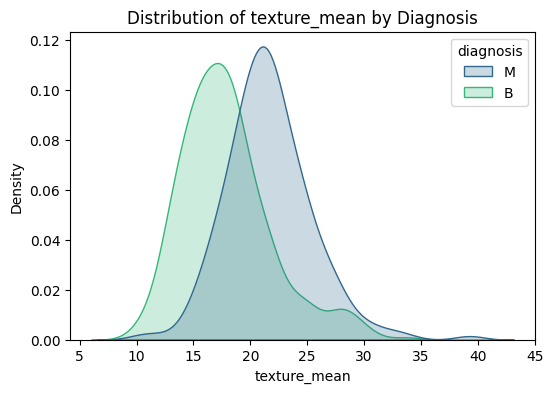

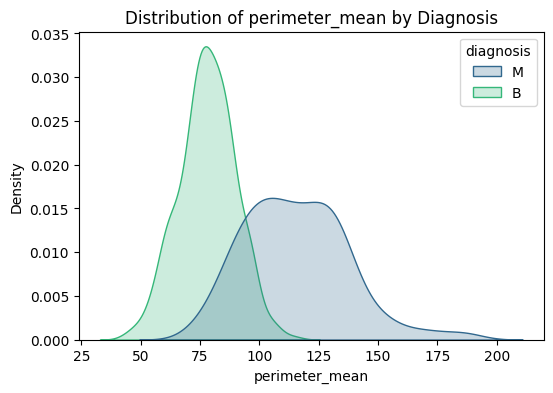

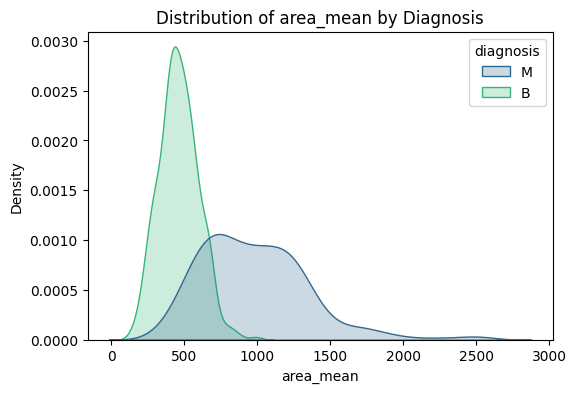

In [12]:
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
for feature in key_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=feature, hue="diagnosis", fill=True,
                palette="viridis", common_norm=False)
    plt.title(f"Distribution of {feature} by Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

In [13]:
for feature in ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']:
    fig = px.histogram(df, x=feature, color='diagnosis',
                       nbins=40, barmode='overlay',
                       title=f'{feature} Distribution by Diagnosis',
                       marginal='box',
                       color_discrete_sequence=px.colors.sequential.Viridis)
    fig.show()

## Model Building

In [14]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# map "M" to 1 and "B" to 0
y = y.map({"M":1, "B":0})

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 42,
    test_size = 0.2,
    stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model=Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.1),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,665 (6.50 KB)

 Trainable params: 1,665 (6.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train, y_train, epochs=40, validation_split=0.2, verbose=1)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.3413 - loss: 0.8062 - val_accuracy: 0.6703 - val_loss: 0.6363
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5321 - loss: 0.6840 - val_accuracy: 0.8462 - val_loss: 0.5554
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7355 - loss: 0.5640 - val_accuracy: 0.9121 - val_loss: 0.4886
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8241 - loss: 0.5169 - val_accuracy: 0.9341 - val_loss: 0.4204
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8781 - loss: 0.4379 - val_accuracy: 0.9341 - val_loss: 0.3552
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8687 - loss: 0.4028 - val_accuracy: 0.9231 - val_loss: 0.2980
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8987 - loss: 0.3591 - val_accuracy: 0.9231 - val_loss: 0.2496
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9157 - loss: 0.2935 - val_accuracy: 0.9231 - val_los

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9815 - loss: 0.1039
Test accuracy: 98.25%


In [19]:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[72,  0],
       [ 2, 40]])

In [21]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9730    1.0000    0.9863        72
           1     1.0000    0.9524    0.9756        42

    accuracy                         0.9825       114
   macro avg     0.9865    0.9762    0.9810       114
weighted avg     0.9829    0.9825    0.9824       114



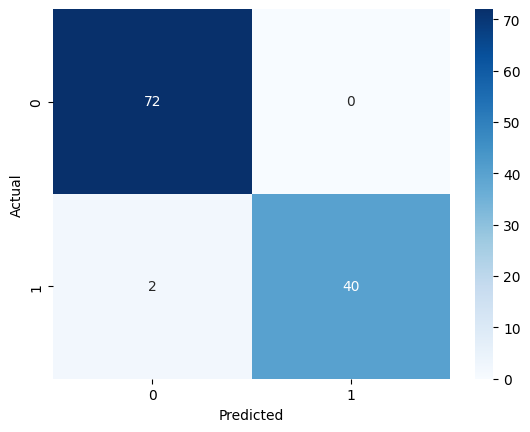

In [22]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Conclusions**

- The ANN model effectively classifies breast cancer with **high accuracy (98%)**.  
- Key predictive features include: `radius_mean`, `perimeter_mean`, and `concave points_mean`.  
- The project demonstrates how **deep learning models** can aid **early diagnosis**.


## **Explainable AI with SHAP**

In [23]:
# import the SHAP library
import shap

In [24]:
# X_train is the scaled training data you created in Cell 18
explainer = shap.DeepExplainer(model, X_train)

/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning:

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(455, 30))']



In [25]:
# X_test is the scaled test data
shap_values = explainer.shap_values(X_test)

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(910, 30))']

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(114, 30))']



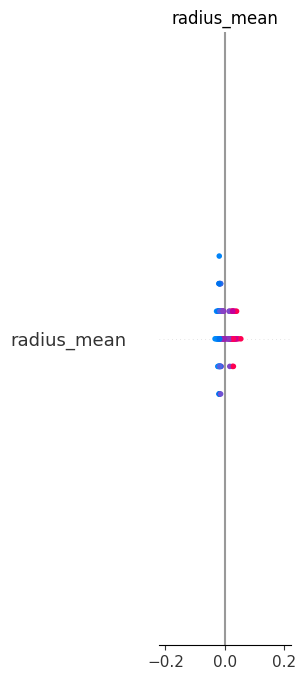

In [26]:
# Get feature names from before scaling (Cell 16)

# Create the summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [28]:
feature_names = X.columns

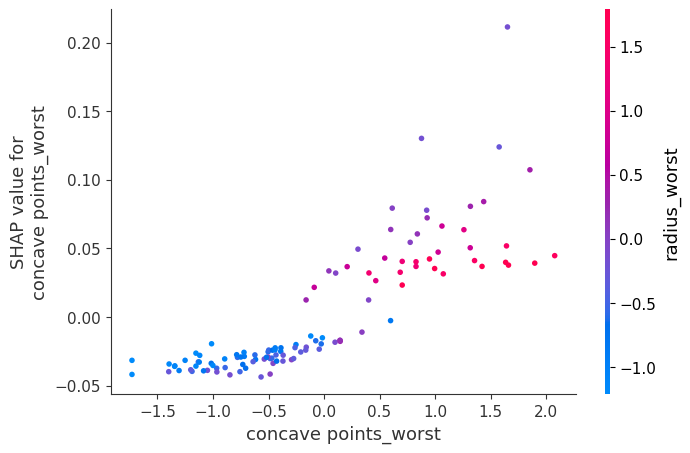

In [29]:
# Show the effect of 'concave points_worst' on the model
# We must .squeeze() the shap_values array from (114, 30, 1) to (114, 30)
shap.dependence_plot("concave points_worst",
                     shap_values.squeeze(),
                     X_test,
                     feature_names=feature_names)

In [30]:
shap_values[0,:,0].shape

(30,)

In [31]:
shap_values[0].squeeze().shape

(30,)

In [32]:
X_test[0,:].shape

(30,)

In [33]:
explainer.expected_value[0].shape

TensorShape([])

In [34]:
# Initialize the JavaScript visualization library
shap.initjs()

# Get the base value (which is a tensor) and convert it to a numpy scalar
base_value = explainer.expected_value[0].numpy()

instance_shap_values = shap_values[0].squeeze()

# Get the feature values for the first instance
instance_features = X_test[0,:]

shap.force_plot(base_value,
                instance_shap_values,
                instance_features,
                feature_names=feature_names)